# Machine Learning - 01_Linear Regression

- machine learning 관점에서 예측한 결과가 얼마나 오차가 존재하는지만 볼 것임

In [8]:
from IPython.display import Image

### Regression 이란?  
숫자와 같이 response가 연속적이고, 크기 순서가 있는 경우를 말함.  
* Linear Regression : 선형으로 모델을 예측하겠다는 것이고, Supervised Learning 모델 중 하나임.  
* Simple Linear Regression : Predicator 가 1개

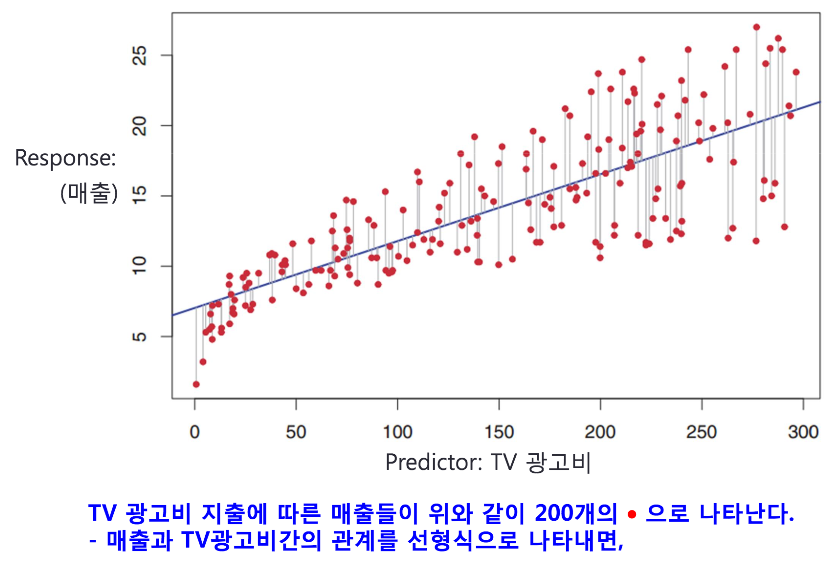

In [11]:
img_path = "ref_img/img_036.png"
Image(filename=img_path, width=500)

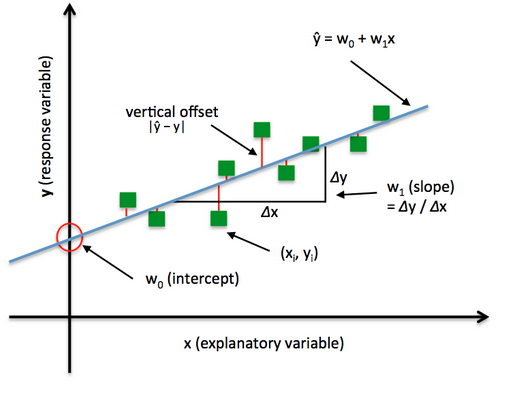

In [12]:
no = "039"
w= 500
img_path1 = "ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

* 데이터의 표현

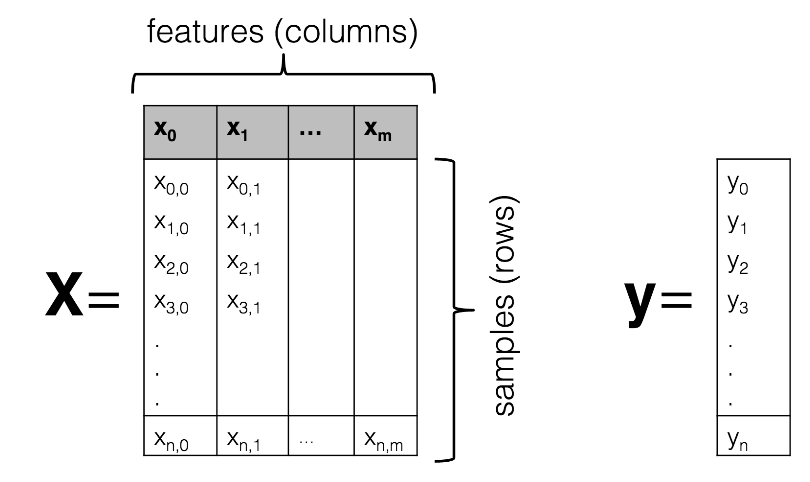

In [13]:
no = "037"
w = 500
img_path1 = "ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

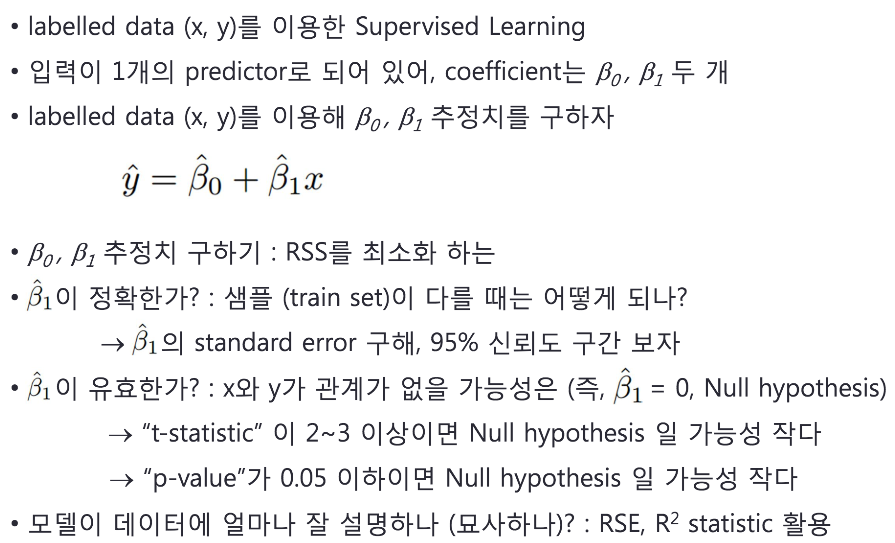

In [14]:
no = "038"
w= 700
img_path1 = "ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

## Example Linear Regrsssion  
### DataSet :  Advertising


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf   
%matplotlib inline

In [2]:
# 아래 경로는 Advertising.csv 에 대한 파일의 경로를 적어 놓으세요...
path = "../data/Advertising.csv"

advertising = pd.read_csv(path, index_col=0)
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


* 데이터 확인 : 200 개의 row (레코드, observation, sample)이 있음. Column은 4 개

In [3]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


### 분석 하기 전에 간략한 특성 파악

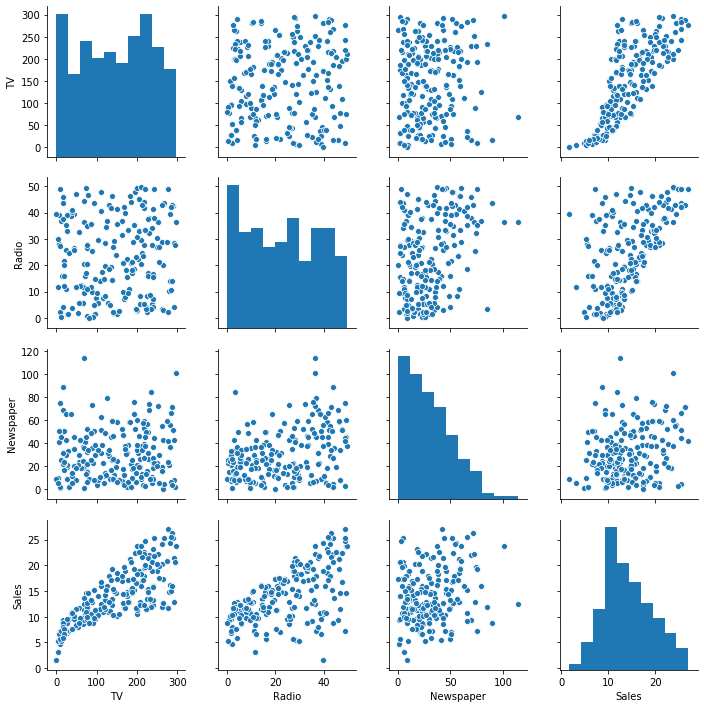

In [6]:
# seanborn 의 패키지를 이용하여 scatter plot 확인
seaborn.pairplot(advertising)

## 여기서는 매채별로 Sales에 관심이 있으니, 이것만 추려서 보자!!!

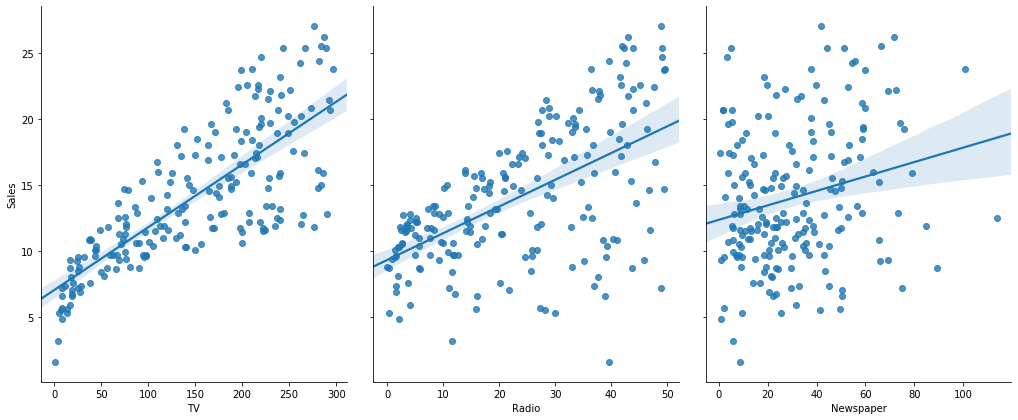

In [7]:
# R의 ggplot처럼, regression line과 95%신뢰대역을 나타내기 위해서 kind = "reg"를 사용... ---> knid에서  reg해서 워닝...
seaborn.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'],
                 y_vars='Sales', height=6, aspect=0.8, kind='reg')

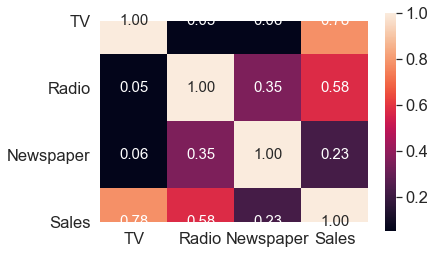

In [8]:
# 상관관계 그래프 확인용!!!
import numpy as np
cols= ['TV', 'Radio', 'Newspaper','Sales']
cm = np.corrcoef(advertising[cols].values.T)
seaborn.set(font_scale=1.5)
hm = seaborn.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

#plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

* --> 위의 그래프의 결론 : TV와 Sales 가 강력한 정비례 관계가 있다!!!

그래서 아래에서 TV와 Sales 의 심플한 관계부터 시작

## Simple Linear Regression : Feature 1개

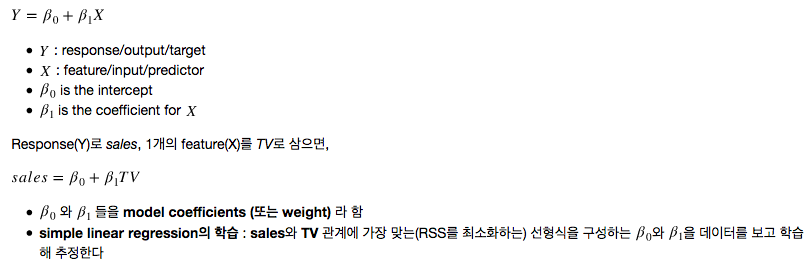

In [22]:
no = "041"
w= 1200
img_path1 = "ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

In [9]:
import statsmodels.formula.api as smf   

In [10]:
# 모델 만들기
lm = smf.ols(formula='Sales ~ TV', data=advertising)   
# 모델을 학습시키기
lm_learned = lm.fit()

In [11]:
# 학습된 모델 계수 확인
lm_learned.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [12]:
# 학습된 모델 p-value
lm_learned.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [13]:
# 학습된 모델 rsqueared
lm_learned.rsquared

0.611875050850071

## 아래 2가지 방법은 response 와  feature 간의 관계를 시각화 하는 예제

In [14]:
# 사전 준비
print (advertising["TV"].min())
print (advertising["TV"].max())
print (pd.DataFrame({'TV':[advertising["TV"].min(), advertising["TV"].max()]}))

0.7
296.4
      TV
0    0.7
1  296.4


Text(0.5, 1.0, 'Simple Linar Regression')

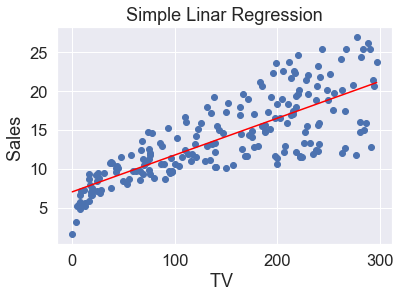

In [15]:
# 방법1)
# Sales를 Y-축에, TV 광고비를 X-축에 놓은 scatter plot을 그리자   
plt.scatter(advertising["TV"], advertising["Sales"])
plt.xlabel("TV ")
plt.ylabel("Sales ")

# 위 plot에 simple regression 선을 overlay  > 최저값에서 최대값가지 2점을 찾아서 이어버린 것!!!
X = pd.DataFrame({'TV':[advertising["TV"].min(), advertising["TV"].max()]})
Y_pred = lm_learned.predict(X)
plt.plot(X, Y_pred, c='red')
plt.title("Simple Linar Regression")

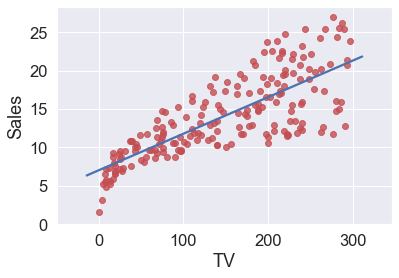

In [16]:
# 방법2) 
# seaborn 패키지를 이용할 수도 
# ci 는 오차관련해서 오버레이 표시 부분 옵션 : 여기서는 오차부분 표시 안 하기 위해서 ..
seaborn.regplot(advertising["TV"], advertising["Sales"], order=1, scatter_kws={'color':'r'}, ci=None)
# 그림에서 여유있게 보기 위해서 양쪽에 마진 50씩
plt.xlim(advertising["TV"].min()-50,advertising["TV"].max()+50)
plt.ylim(ymin=0);

In [17]:
lm_learned.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.47e-42
Time:                        11:46:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# 위의 결과 중에서 일부만 볼 때!!!
lm_learned.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


##  학습된 모델을 바탕으로 예측에 활용  
* 위의 모델은 여러 변수가 있지만, 그 중에서 상관관계가 높은 TV만 활용하여 만든 모델임  
* R-squared =0.612로 [ 일반적으로 학계는 0.6이상, 마케팅 조사에서는 0.4정도 이상이면 사용가능하다고 기준] --> 원인 변수들이 약 60퍼센트 정도 설명한다는 것임.  --> 그정도로 설명이 가능하냐? 사회과학에서 입니다;;;
* 지금은 경진대회처럼 test 셋이 따로 있는 것이 아니라 나누지 않고 그냥 다 모델에 학습시켰기에, 과최적화가 되었음.

### TV=100일때 예측해보자!  y = 7.0326 + 0.04575 * X

In [19]:
lm_learned.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [20]:
lm_learned.params.Intercept

7.032593549127696

In [21]:
lm_learned.params.TV

0.047536640433019764

In [22]:
sales_manual = lm_learned.params.Intercept + lm_learned.params.TV * 100
print("Manual Calculation : %6f" % sales_manual)

Manual Calculation : 11.786258


* TV=100,400, 80 일때 예측하자!

In [23]:
X_new = pd.DataFrame({'TV': [100, 422, 74]})   # TV가 100, 422, 또는 74일때 Sales 예측은? 
lm_learned.predict(X_new)

0    11.786258
1    27.093056
2    10.550305
dtype: float64

## Multiple Linear Regression : Feature 여러개  

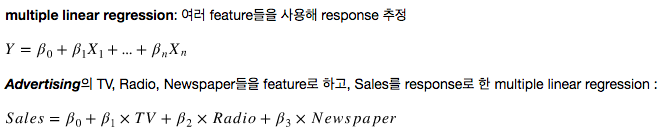

In [38]:
no = "042"
w= 1000
img_path1 = "ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

In [24]:
lm_mul = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        11:49:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결과 해석  
* F-statstic  의 p-value가 매우 작기 때문에 모델은 요효[최소 1개 이상의 variable이 response와 관련]  
* TV/Radio 의  p-value는 의미가 있으나, Newspaper는 p-value가 0.860으로 일반적인 0.05기준에 미달하여, 관련이 없어서, "Newspaper 은 Sales과 관련이 없다"는 귀무가설을 거부할 수 없음!!--> Newspapers는 모델에서 제거해야 함.  
* r-squared = 0.89로 simple Linear Regression=0.612보다 증가. 이 경우 심플보다는 멀티로 돌리는게 모델이 더 좋음.  
* 다만, r-squared 값은 학습에 사용한 데이터에 한정되어서 계산되는 값이기 때문에, 새로운 데이터에 대해서 이 정도의 성능을 유지할지는 아직 미지수임!! 이러한 한계는 인지해야 함!!  
* Cross-validation을 이용해서 보지 못한 out-of-sample에 대해서도 generalization 도 할 수는 있음..

### 주요한 다른 사항!!!

In [40]:
# 아래 usecol 설명을 위해서...
temp = pd.read_csv("data/Credit.csv")
temp.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [41]:
path = "data/Credit.csv"
credit = pd.read_csv(path, usecols=list(range(1,12)))
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [42]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


* 모든 컬럼이 숫자가 아니다!!!!! float64, int64 이외의 string,object 등이 있음. --> Category 변수!!!  
* Gender/Student/Married/Ethnicity 는 categorical 변수  
* 400개의 관찰이 있는데, missing-value는 없음!

In [43]:
credit.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

* 앞의 방법을 이용하여 ['Balance','Age','Cards','Education','Income','Limit','Rating'] 의 그래프들을 확인하자!

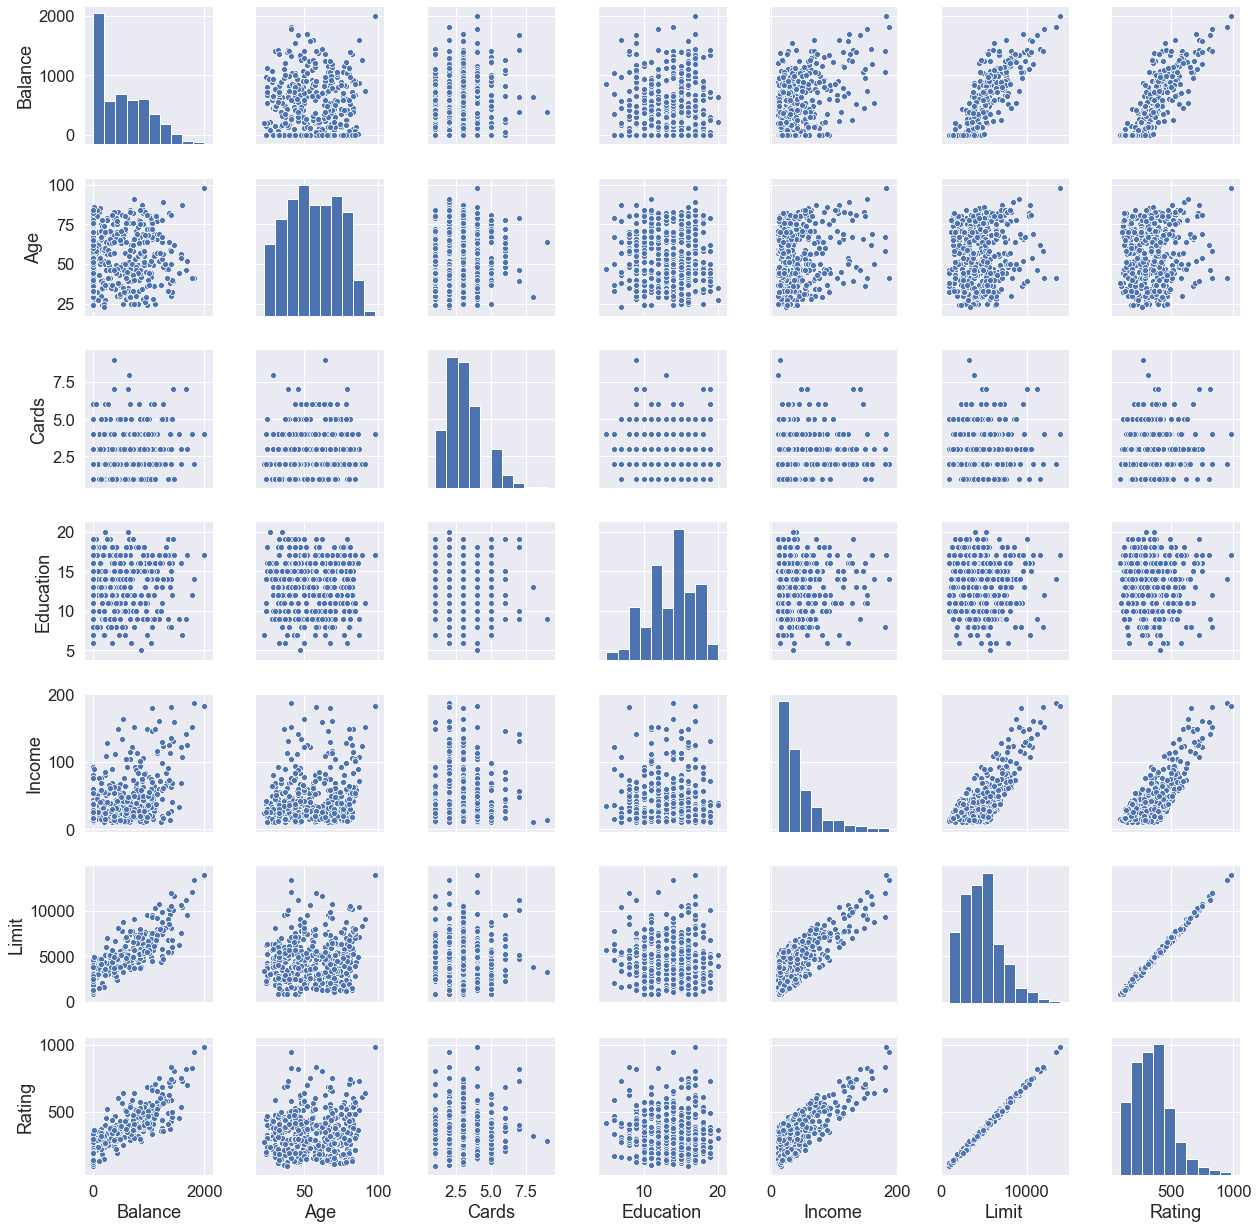

In [44]:
seaborn.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

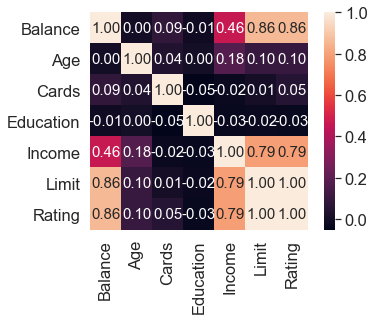

In [45]:
# 상관관계 그래프 확인용!!!
import numpy as np
cols= ['Balance','Age','Cards','Education','Income','Limit','Rating']
cm = np.corrcoef(credit[cols].values.T)
seaborn.set(font_scale=1.5)
hm = seaborn.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

#plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

* Gender 의 값 확인

In [46]:
credit.Gender.unique()   

array([' Male', 'Female'], dtype=object)

## Category Type Gender를 Feature로 사용해보자!!!!

In [47]:
# Regression of Balance onto Gender
lm_cat = smf.ols(formula='Balance ~ Gender', data=credit).fit()
lm_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Mon, 03 Feb 2020   Prob (F-statistic):              0.669
Time:                        10:28:58   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
lm_cat.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [49]:
# Regression of Balance onto Ethnicity
lm_cat_Eth = smf.ols('Balance ~ Ethnicity', credit).fit()
lm_cat_Eth.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Mon, 03 Feb 2020   Prob (F-statistic):              0.957
Time:                        10:28:58   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 해석 : F-statistic p-value가 0.957에 달해(5%보다 너무나도 큼;;;) 'Balance와 Ethnicity간 관련이 없다'는 null hypothesis를 거부할 수 없기에 이 데이터에 따르면 null hypothesis를 따른는 것이 좋다. 즉, 이 모델은 Fail!!!

### 모델에서 Ethnicity 제거

In [51]:
lm_all = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married', credit).fit()
                 
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     918.2
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          2.49e-256
Time:                        10:32:03   Log-Likelihood:                -2399.4
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     390   BIC:                             4859.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -468.4037     34.355    -13.634      0.000    -535.948    -400.859
Gender[T.Female]   -10.4067      9.904     -1.051      0.294     -29.879       9.065
Student[T.Yes]     426.4692     16.678     25.571      0.000     393.680     459.259
Married[T.Yes]      -7.0191     10.278     -0.683      0.495     -27.226      13.188
Income              -7.8020      0.234    -33.349      0.000      -8.262      -7.342
Limit                0.1931      0.033      5.909      0.000       0.129       0.257
Rating               1.1023      0.489      2.253      0.025       0.140       2.064
Cards               17.9233      4.332      4.137      0.000       9.406      26.441
Age                 -0.6347      0.293     -2.164      0.031      -1.211      -0.058
Education           -1.1150      1.596     -0.699      0.485      -4.253       2.023
==============================================================================
Omnibus:                       34.234   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.854
Skew:                           0.775   Prob(JB):                     1.34e-09
Kurtosis:                       3.217   Cond. No.                     3.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* F Satatistic 에서 p-value 가 유의!!!

## Removing the Additive Assumptions : 변수간 Interaction

In [52]:
# TV와 Radio간 interaction term을 주고 linear model을 만들면
lm_interact = smf.ols('Sales ~ TV + Radio + TV:Radio', advertising).fit()
lm_interact.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


* TV와 Radio간의 interaction 이 유효!!!

In [53]:
smf.ols('Sales ~ TV*Radio', advertising).fit().summary().tables[1]  

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [54]:
smf.ols('Sales ~ TV + Newspaper*Radio', advertising).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.6
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           3.25e-95
Time:                        10:32:09   Log-Likelihood:                -385.95
No. Observations:                 200   AIC:                             781.9
Df Residuals:                     195   BIC:                             798.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1467      0.437      7.193      0.000       2.284       4.009
TV                  0.0458      0.001     32.746      0.000       0.043       0.049
Newspaper          -0.0094      0.014     -0.688      0.492      -0.036       0.018
Radio               0.1801      0.015     11.930      0.000       0.150       0.210
Newspaper:Radio     0.0003      0.000      0.678      0.498      -0.001       0.001
==============================================================================
Omnibus:                       60.978   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.663
Skew:                          -1.344   Prob(JB):                     1.17e-33
Kurtosis:                       6.313   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Newspaper와 Radio 간의 interaction은 유효하지 않음!!!


## Interaction between qualitative variable and a quantitative variable¶


In [55]:
# Income(quantitative) 과 Student(qualitative with 2 levels)간 Interaction이 없다하고 모델을 학습하면;
lm_no_interact = smf.ols('Balance ~ Income  + Student', credit).fit()   
lm_no_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           9.64e-29
Time:                        10:32:11   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        211.1430     32.457      6.505      0.000     147.333     274.952
Student[T.Yes]   382.6705     65.311      5.859      0.000     254.272     511.069
Income             5.9843      0.557     10.751      0.000       4.890       7.079
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# ncome(quantitative) 과 Studen(qualitative with 2 levels)간 Interaction이 있게 만들면;
lm_interact = smf.ols('Balance ~ Income*Student', credit).fit()
lm_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           4.94e-28
Time:                        10:32:11   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.6232     33.698      5.953      0.000     134.373     266.873
Student[T.Yes]          476.6758    104.351      4.568      0.000     271.524     681.827
Income                    6.2182      0.592     10.502      0.000       5.054       7.382
Income:Student[T.Yes]    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 'Income'과 'Student' 사이의 interaction이 없다고 생각하는 것이 옳으며, 이는 R-square 값이 거의 증가하지 않은 것을 통해서도 짐작할 수 있다.

# 실습!!!) 위의 credit.csv 파일을 가지고 balance에 대한 선형 회귀 모델을 만들어 보세요!!!!